In [1]:
import numpy
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
#import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#SHAP
import shap
import xgboost
from mpl_toolkits import mplot3d




import pandas as pd
from sklearn.datasets import make_regression
import random

In [2]:

#Generate data from an additive model

#Step.1 Sinus and Cosinus on [0, 2*pi]
sample = 200
x1 = np.array([np.linspace(0, 2*np.pi, sample)]).T
x1 = np.concatenate(x1)
random.shuffle(x1)


x2 = np.array([np.linspace(0, 2*np.pi, sample)]).T
x2 = np.concatenate(x2)
random.shuffle(x2)

#x_pandas = pd.DataFrame(x)
#Sinus
y_sin = np.sin(x1) # f_1(x_1)


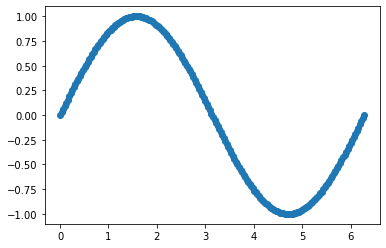

In [3]:
plt.scatter(x1, y_sin, label="Sinus")



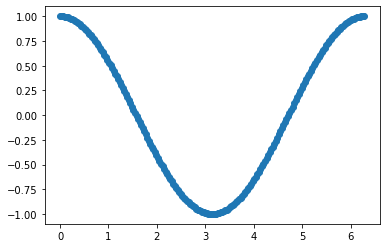

In [4]:
#Cosinus
y_cos = np.cos(x2) # f_2(x_2)
#y_cos_pandas = pd.DataFrame(y_cos) -> for shap
plt.scatter(x2, y_cos, label="Cosinus")

In [5]:
# DGP
dep = y_sin + y_cos + 0.1*x1*x2 + 0.05*np.random.randn(200)  # + constant


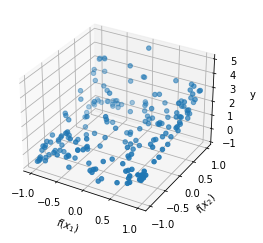

<Figure size 432x288 with 0 Axes>

In [6]:
#3d plot
fig = plt.figure()
ax = plt.axes(projection ='3d')
# plotting
ax.scatter3D(y_sin, y_cos, dep, 'green')
#ax.set_title('3D line plot geeks for geeks')
ax.set_xlabel('$f(x_1)$')
ax.set_ylabel('$f(x_2)$')
ax.set_zlabel('y')
plt.show()

#plt.savefig('3d.png', transparent=True)



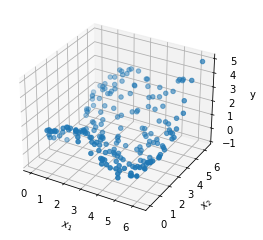

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
# plotting
ax.scatter3D(x1, x2, dep, 'green')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
plt.show()

#plt.savefig('3dd.png', transparent=True)



In [8]:
x1_pandas = pd.DataFrame(x1)
x2_pandas = pd.DataFrame(x2)
x1_pandas.columns = ['x1']
x2_pandas.columns = ['x2']
design = pd.concat([x1_pandas['x1'], x2_pandas['x2']], axis=1, keys=['x1', 'x2'])


In [9]:
#building the architecture of the NN
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu')) # model expects 2 input variables and 12 layers in first hidden layer
model.add(Dense(64, activation='relu')) # second hidden layer has 8 nodes
model.add(Dense(64, activation='relu')) # second hidden layer has 8 nodes
model.add(Dense(1, activation='linear')) # output layer has 1 node
model.compile(loss='mse', optimizer='rmsprop')
model.fit(design, dep, epochs=800, batch_size=130)
pred = model.predict(design)


Epoch 1/800
2/2 [==============================] - 1s 2ms/step - loss: 2.4705
Epoch 2/800
2/2 [==============================] - 0s 2ms/step - loss: 1.1282
Epoch 3/800
2/2 [==============================] - 0s 2ms/step - loss: 0.8532
Epoch 4/800
2/2 [==============================] - 0s 2ms/step - loss: 0.7706
Epoch 5/800
2/2 [==============================] - 0s 3ms/step - loss: 0.7312
Epoch 6/800
2/2 [==============================] - 0s 3ms/step - loss: 0.7032
Epoch 7/800
2/2 [==============================] - 0s 2ms/step - loss: 0.6839
Epoch 8/800
2/2 [==============================] - 0s 3ms/step - loss: 0.6680
Epoch 9/800
2/2 [==============================] - 0s 2ms/step - loss: 0.6825
Epoch 10/800
2/2 [==============================] - 0s 4ms/step - loss: 0.6901
Epoch 11/800
2/2 [==============================] - 0s 3ms/step - loss: 0.6516
Epoch 12/800
2/2 [==============================] - 0s 2ms/step - loss: 0.6557
Epoch 13/800
2/2 [==============================] - 0s 4ms/st

2/2 [==============================] - 0s 2ms/step - loss: 0.0970
Epoch 207/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1174
Epoch 208/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0916
Epoch 209/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 210/800
2/2 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 211/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0866
Epoch 212/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1133
Epoch 213/800
2/2 [==============================] - 0s 4ms/step - loss: 0.1926
Epoch 214/800
2/2 [==============================] - 0s 3ms/step - loss: 0.1196
Epoch 215/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0785
Epoch 216/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 217/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 218/800
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.1109
Epoch 411/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 412/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 413/800
2/2 [==============================] - 0s 5ms/step - loss: 0.0289
Epoch 414/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 415/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 416/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 417/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 418/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 419/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 420/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 421/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 422/800
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 615/800
2/2 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 616/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 617/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 618/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 619/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 620/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0378
Epoch 621/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 622/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 623/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 624/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 625/800
2/2 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 626/800
2/2 [==============================] - 0

Text(0, 0.5, 'dependent variable')

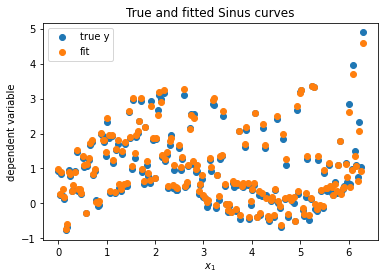

In [10]:
plt.figure(1)
plt.scatter(x1, dep, label="true y")
plt.scatter(x1, pred, label="fit")
plt.legend()

plt.title("True and fitted Sinus curves")
plt.xlabel("$x_1$")
plt.ylabel("dependent variable")


Text(0, 0.5, 'dependent variable')

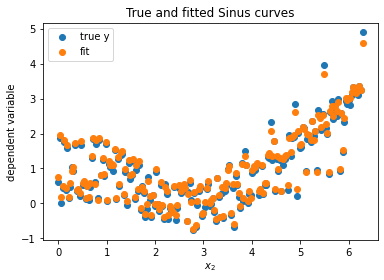

In [11]:
plt.figure(2)
plt.scatter(x2, dep, label="true y")
plt.scatter(x2, pred, label="fit")
plt.legend()

plt.title("True and fitted Sinus curves")
plt.xlabel("$x_2$")
plt.ylabel("dependent variable")

In [12]:
#shapley values for keras example
explainer = shap.KernelExplainer(model = model.predict, data = design.iloc[:,:], link = "identity")
shap_values = explainer.shap_values(design.iloc[:,:], nsamples=800)



Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 2400x2400 with 0 Axes>

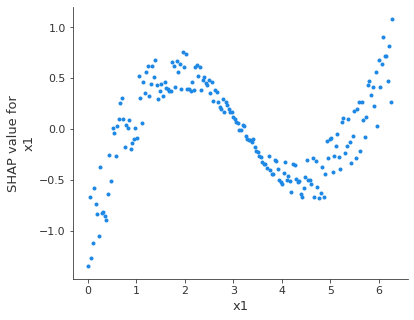

In [13]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("x1", shap_values[0], design, interaction_index=None) #works


<Figure size 2400x2400 with 0 Axes>

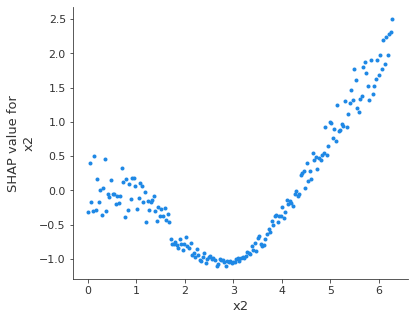

In [14]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("x2", shap_values[0], design, interaction_index=None) #works



Text(0.5, 0, '$x_1$')

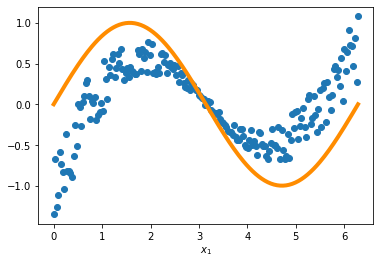

In [20]:
shaps = shap_values[0][:,0]    
x1_pandas = pd.DataFrame(x1)
x2_pandas = pd.DataFrame(shaps)
x3_pandas = pd.DataFrame(y_sin)
x1_pandas.columns = ['x1']
x2_pandas.columns = ['shaps']
x3_pandas.columns = ['y_sin']
temp = pd.concat([x1_pandas['x1'], x2_pandas['shaps'], x3_pandas['y_sin']], axis=1, keys=['x1', 'shaps', 'y_sin'])
temp = temp.sort_values("x1") # sort it for plot

plt.scatter(temp['x1'], temp['shaps'], label="Shap")
plt.plot(temp['x1'], temp['y_sin'], label="$f_1(x_1)$", color="darkorange", linewidth=4)
#plt.legend()
plt.xlabel("$x_1$")

#plt.savefig('model1_x1.png', transparent=True)

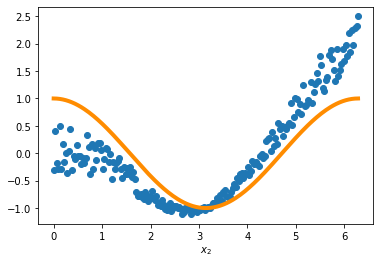

In [21]:
shaps = shap_values[0][:,1]                   
x1_pandas = pd.DataFrame(x2)
x2_pandas = pd.DataFrame(shaps)
x3_pandas = pd.DataFrame(y_cos)
x1_pandas.columns = ['x2']
x2_pandas.columns = ['shaps']
x3_pandas.columns = ['y_cos']
temp = pd.concat([x1_pandas['x2'], x2_pandas['shaps'], x3_pandas['y_cos']], axis=1, keys=['x2', 'shaps', 'y_cos'])
temp = temp.sort_values("x2") # sort it for plot



plt.scatter(temp['x2'], temp['shaps'], label="Shap")
plt.plot(temp['x2'], temp['y_cos'], label="$f_2(x_2)$", color="darkorange", linewidth=4)
#plt.legend()
plt.xlabel("$x_2$")

plt.savefig('model1_x2.png', transparent=True)

